In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library



In [2]:
# No warning of any kind please!
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
# importing the dataset to a variable
data = pd.read_csv("K:/CIC-2017-dataset/CIC-IDS-2017/MergedML_CSV/feature14.csv")

# displaying first 3 observations
data.head(3)

,Destination Port,Init_Win_bytes_forward,Init_Win_bytes_backward,Flow IAT Min,Fwd IAT Min,Bwd IAT Min,Average Packet Size,Bwd Packet Length Std,Fwd Packet Length Std,Packet Length Std,Total Backward Packets,Total Length of Bwd Packets,min_seg_size_forward,Label
0,49188,329,-1,4,4,0,9.0,0.0,0.0,0.0,0,0,20,0
1,49188,329,-1,1,1,0,9.0,0.0,0.0,0.0,0,0,20,0
2,49188,329,-1,1,1,0,9.0,0.0,0.0,0.0,0,0,20,0


In [4]:
 # Numerical feature
listLabel = list(data[" Label"].drop_duplicates().values)
print('\n The types of all traffics are {}'.format(listLabel))


 The types of all traffics are [0, 1, 2, 3, 4, 5, 6, 7]


In [5]:
# grouping by forest cover type and calculating total occurance
data.groupby(' Label').size()

 Label
0    1984531
1      13835
2     252661
3         11
4       2180
5       1966
6     128027
7     158930
dtype: int64

In [6]:
data[' Label'] = data[' Label'].map({0:0, 
                                     1:1, 2:1,
                                     3:1, 4:1,
                                     5:1, 6:1,
                                     7:1
                                     })

In [7]:
# grouping by forest cover type and calculating total occurance
data.groupby(' Label').size()

 Label
0    1984531
1     557610
dtype: int64

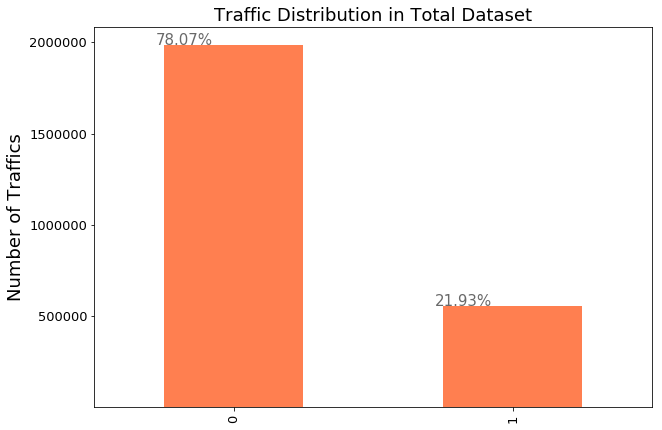

In [8]:
ax = data[' Label'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Traffic Distribution in Total Dataset", fontsize=18)
ax.set_ylabel("Number of Traffics", fontsize=18);
ax.set_yticks([500000, 1000000, 1500000, 2000000])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

# Feature Comparison
Next let's compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use Violin Plot to visualize this, a combination of Box Plot and Density Plot (Histogram).

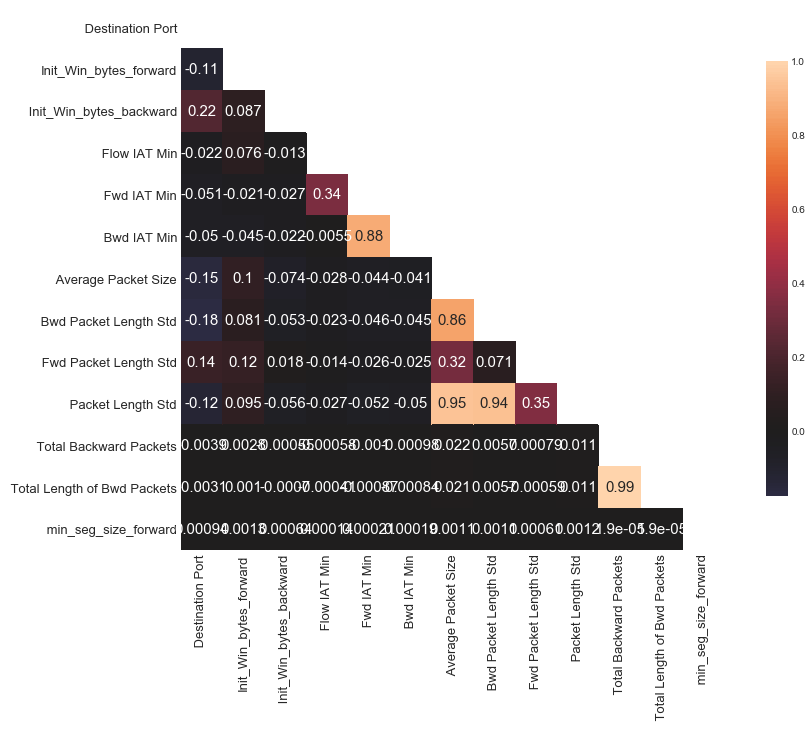

In [30]:
######    5    #######
# Correlation Plot
# Correlation of each feature

# fig size
plt.subplots(figsize=(15, 10))

# Compute the correlation matrix
num_fea_corr = num_fea.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(num_fea_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generates heatmap masking the upper triangle and shrinking the cbar
sns.heatmap(num_fea_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})

# x-axis label size
plt.xticks(size = 13)
# y-axis label size
plt.yticks(size = 13)

# display plot
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542141 entries, 0 to 2542140
Data columns (total 14 columns):
 Destination Port               int64
Init_Win_bytes_forward          int64
 Init_Win_bytes_backward        int64
 Flow IAT Min                   int64
 Fwd IAT Min                    int64
 Bwd IAT Min                    int64
 Average Packet Size            float64
 Bwd Packet Length Std          float64
 Fwd Packet Length Std          float64
 Packet Length Std              float64
 Total Backward Packets         int64
 Total Length of Bwd Packets    int64
 min_seg_size_forward           int64
 Label                          int64
dtypes: float64(4), int64(10)
memory usage: 271.5 MB


In [11]:
# importing feature scaling function
from sklearn.preprocessing import MinMaxScaler

# passing range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))

# feeding sample features to var 'X'
X = data.iloc[:,:-1]

# feeding our target variable to var 'y'
y = data[' Label']

# apply feature scaling to all features
X_scaled = scaler.fit_transform(X)
#s_sample_2 = scaler.fit_transform(X2)

In [25]:
X.shape     # (2542141, 13)
y.shape

(2542141,)

In [24]:
data.shape   # (2542141, 14)

(2542141, 14)

In [12]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [13]:
# number of training observation
print(X_train.shape, X_test.shape)

(1906605, 13) (635536, 13)


In [14]:
### defining function for training models and measuring performance 

# to measure performance
from sklearn.model_selection import cross_val_score

# for calculating time elapsed
import time

# fucntion
def model_evaluation(clf):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    t_start = time.time()
    # classifier learning the model
    clf = clf.fit(X_train, y_train)
    # records time
    t_end = time.time()
    
    
    # records time
    c_start = time.time()     
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    # records the time
    c_end = time.time()    
    
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    
    # substracts end time with start to give actual time taken in seconds
    # divides by 60 to convert in minutes and rounds the answer to three decimal places
    # time in training
    t_time = np.round((t_end - t_start) / 60, 3)
    # time for evaluating scores
    c_time = np.round((c_end - c_start) / 60, 3)
    
    
    # Removing traces of classifier
    clf = None
    
    
    # returns performance measure and time of the classifier 
    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.")

In [15]:
# importing Multinomial classifier, one of the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# passing the model to function to get performance measures
model_evaluation(MultinomialNB())

The accuracy score of this classifier on our training set is 83.45 % and f1 score is 64.9 % taking 0.011 minutes to train and 0.323 minutes to evaluate cross validation and metric scores.


In [16]:
# importing Random Forest function
from sklearn.ensemble import RandomForestClassifier

model_evaluation(RandomForestClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 99.84 % and f1 score is 99.76 % taking 0.412 minutes to train and 20.365 minutes to evaluate cross validation and metric scores.


In [17]:
# importing Stochastic Gradient Descent Classifier function
from sklearn.linear_model import SGDClassifier

model_evaluation(SGDClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 87.4 % and f1 score is 76.32 % taking 0.057 minutes to train and 1.246 minutes to evaluate cross validation and metric scores.


In [18]:
from sklearn.linear_model import LogisticRegression

model_evaluation(LogisticRegression(n_jobs = -1, random_state = 53))

The accuracy score of this classifier on our training set is 85.44 % and f1 score is 73.05 % taking 1.205 minutes to train and 14.346 minutes to evaluate cross validation and metric scores.


In [19]:
# importing EM scores for model performance measure
from sklearn.metrics import accuracy_score, f1_score

# definning best chosen classifier
clf = RandomForestClassifier(n_estimators = 50, random_state = 53)

# training our model
clf = clf.fit(X_train, y_train)

# predicting unseen data
predict = clf.predict(X_test)

# calculating accuracy
accuracy = accuracy_score(y_test, predict)

# calculating f1 score
f1_score = f1_score(y_test, predict, average = 'macro')

# taking precentage and rounding to 3 places
accuracy = np.round(accuracy * 100, 3)
f1_score = np.round(f1_score * 100, 3)

# cleaning traces
clf = None

# results
print("The accuracy score of our final model Random Forest Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")

The accuracy score of our final model Random Forest Classifier on our testing set is 99.783 % and f1 score is 99.685 %.


# Classifier/ generating classification model¶
1.Xgboost classifier

In [20]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 98.78%
Thresh=0.000, n=13, Accuracy: 98.78%
Thresh=0.000, n=13, Accuracy: 98.78%
Thresh=0.002, n=11, Accuracy: 98.78%
Thresh=0.012, n=10, Accuracy: 98.78%
Thresh=0.021, n=9, Accuracy: 98.62%
Thresh=0.029, n=8, Accuracy: 98.68%
Thresh=0.037, n=7, Accuracy: 98.68%
Thresh=0.053, n=6, Accuracy: 98.54%
Thresh=0.058, n=5, Accuracy: 97.39%
Thresh=0.099, n=4, Accuracy: 97.30%
Thresh=0.144, n=3, Accuracy: 96.43%
Thresh=0.204, n=2, Accuracy: 88.64%
Thresh=0.342, n=1, Accuracy: 78.01%


In [21]:
# select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)

# Fitting the model

In [1]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)
            
# Train Decision Tree Model
# DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
# DTC_Classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

# Evaluate the previous model

In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.6762806142746004

Model Accuracy:
 0.6762806139709064

Confusion matrix:
 [[1094876  393861]
 [ 223344  194524]]

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78   1488737
           1       0.33      0.47      0.39    417868

   micro avg       0.68      0.68      0.68   1906605
   macro avg       0.58      0.60      0.58   1906605
weighted avg       0.72      0.68      0.69   1906605



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9994414153503903

Model Accuracy:
 0.999796496914673

Confusion matrix:
 [[1488372     365]
 [     23  417845]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1488737
           1   

# Validating the model

In [ ]:
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()  